In [1]:
import pandas as pd
import numpy as np
import ta

In [2]:
df = pd.read_csv(r"D:\business-analytics-project-main\MSFT.csv")

In [3]:
df=df[df.Date>='1995-01-01']

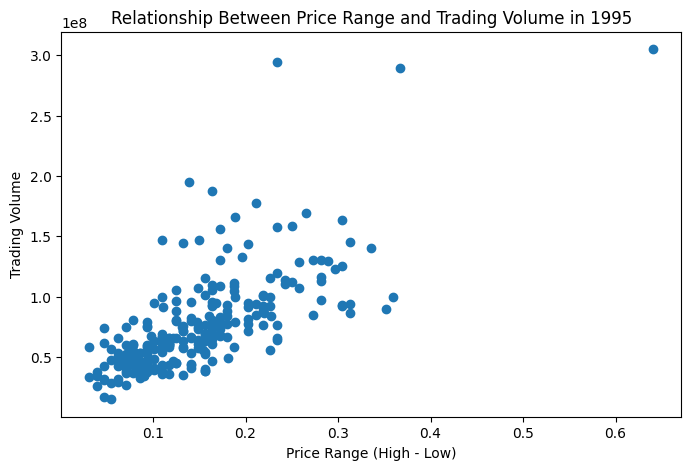

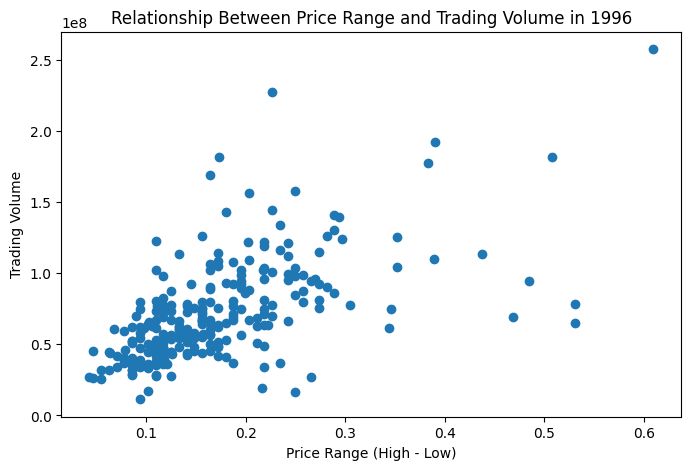

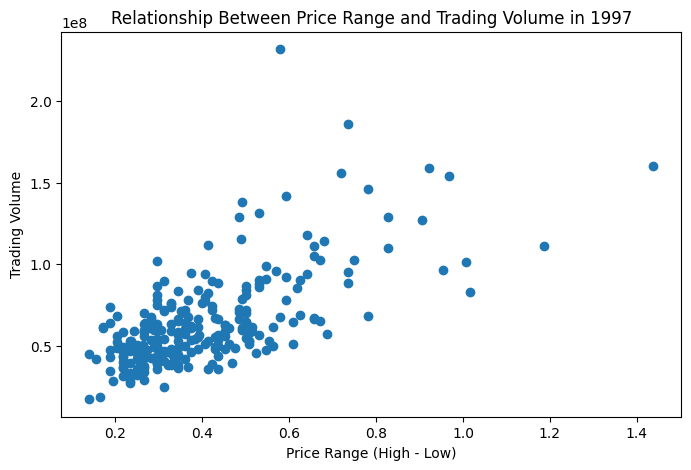

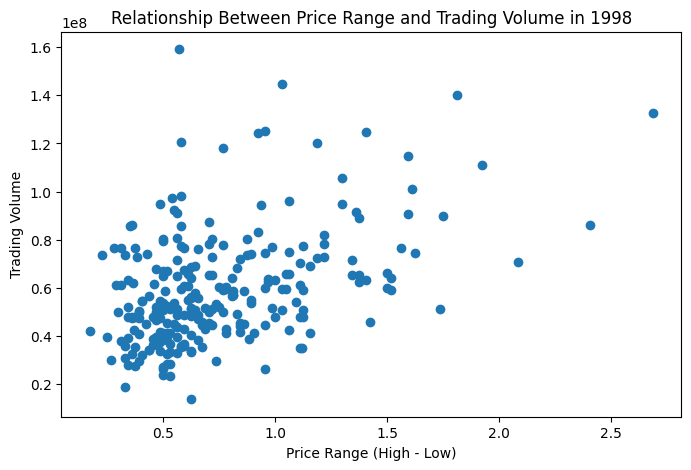

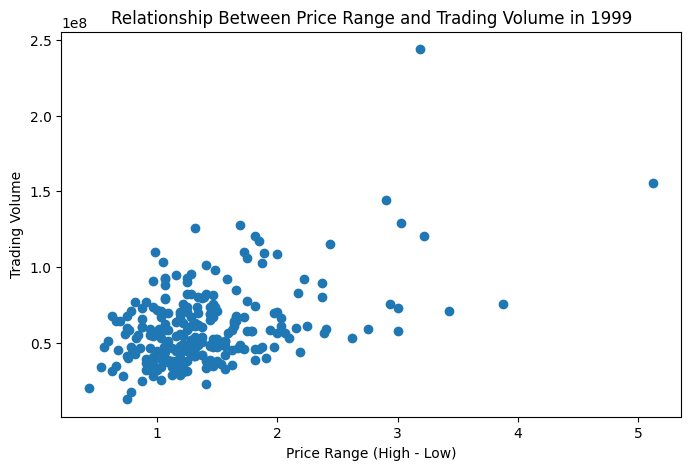

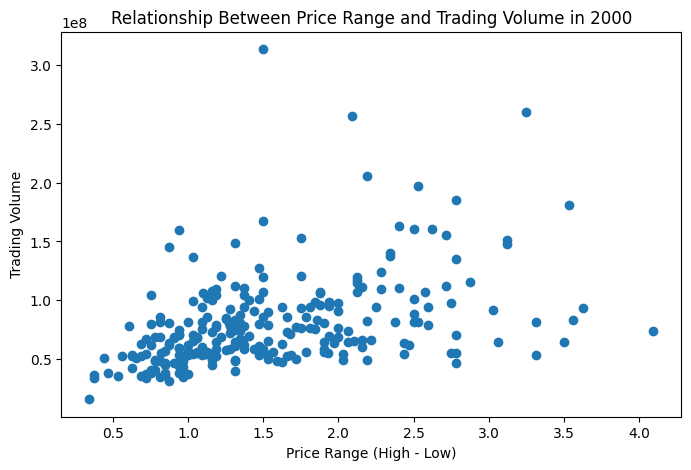

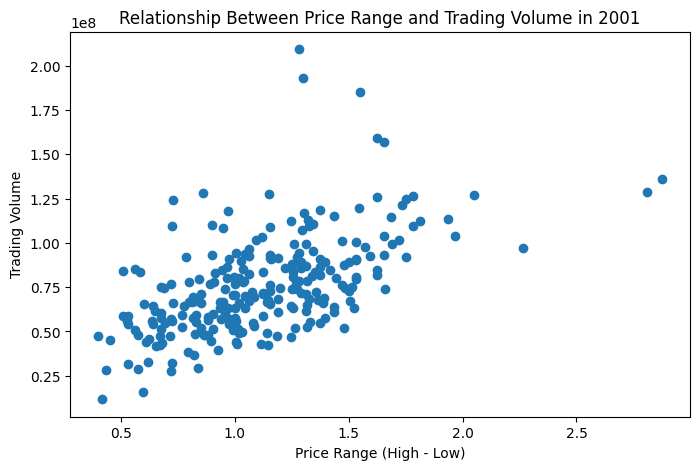

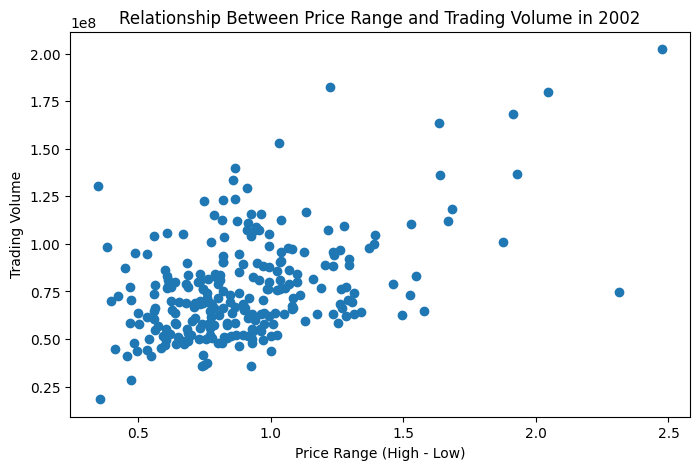

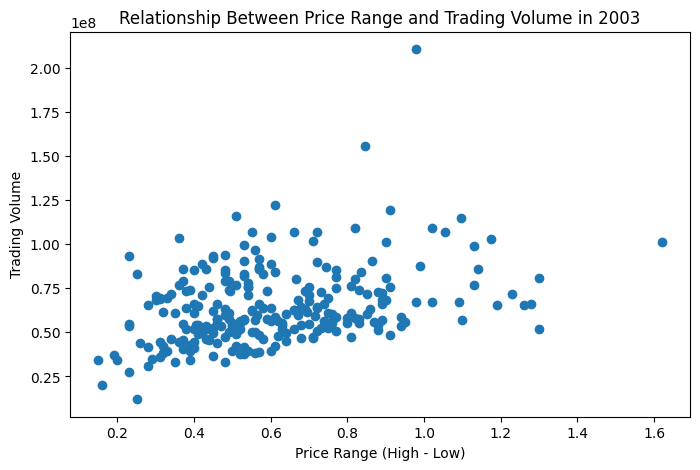

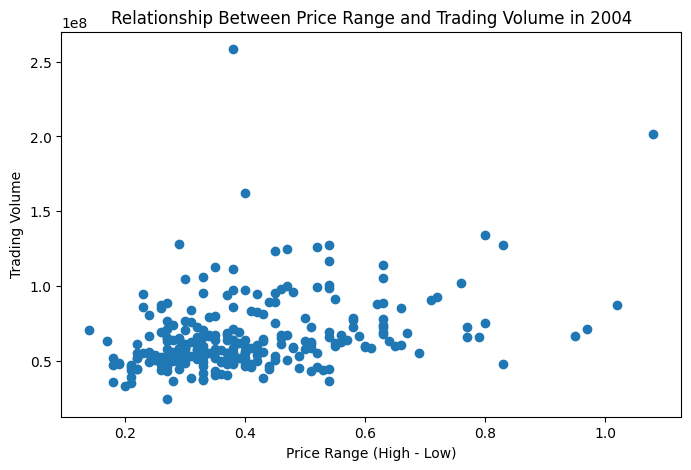

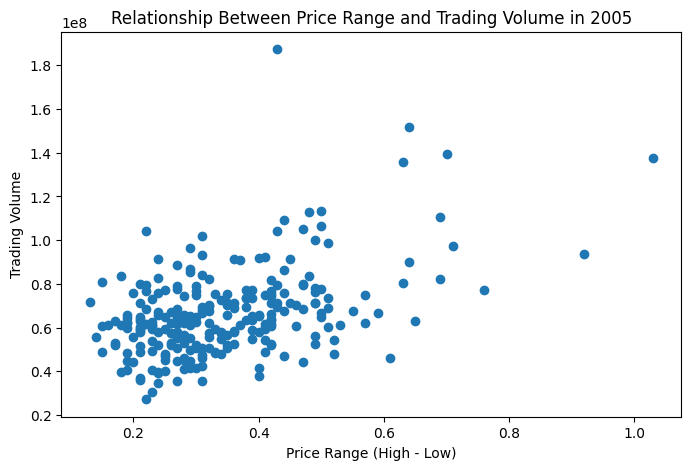

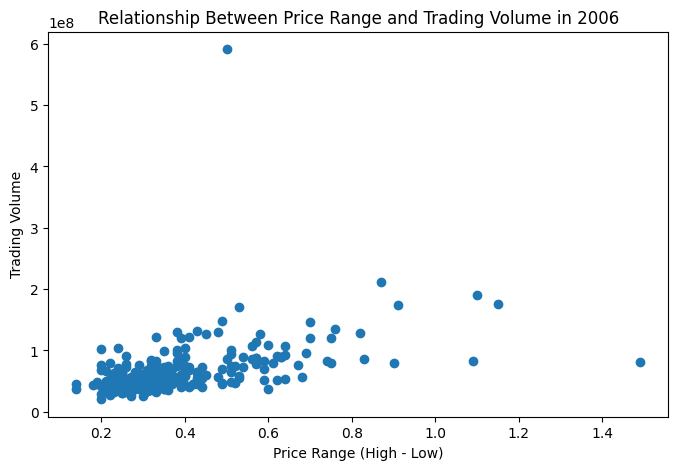

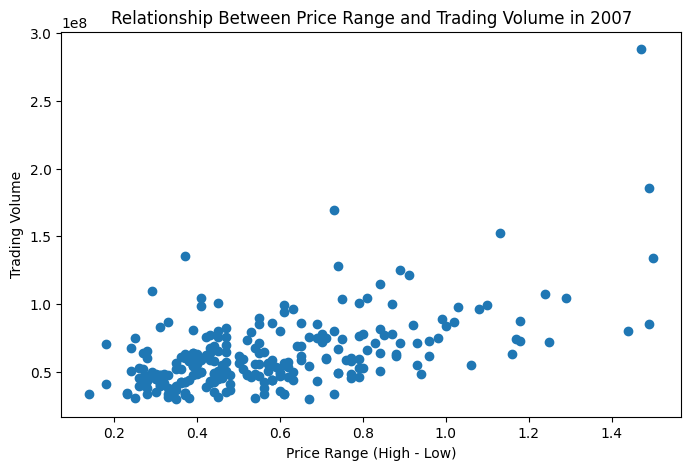

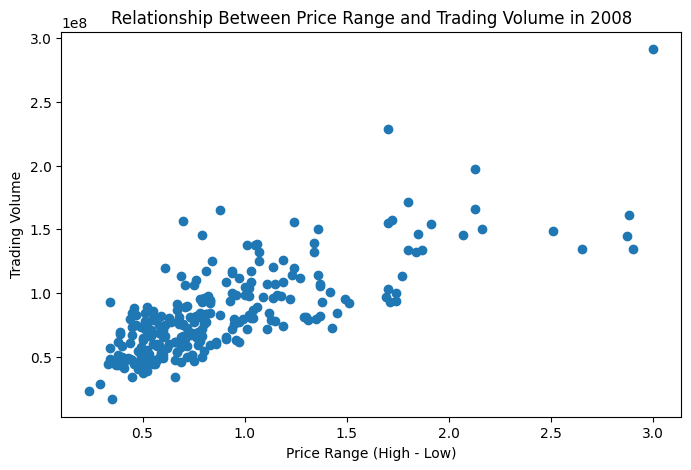

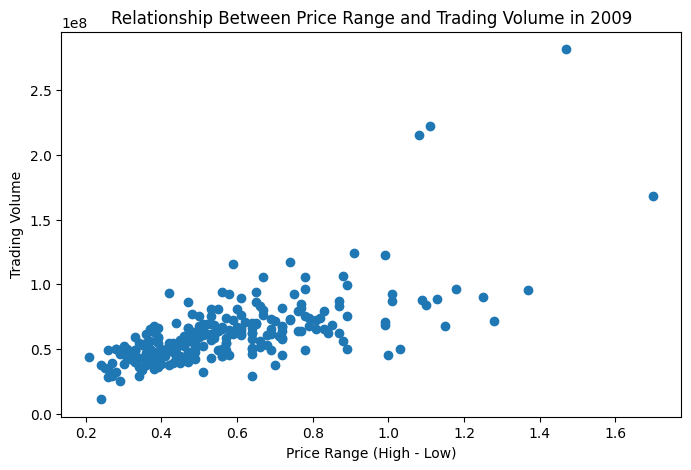

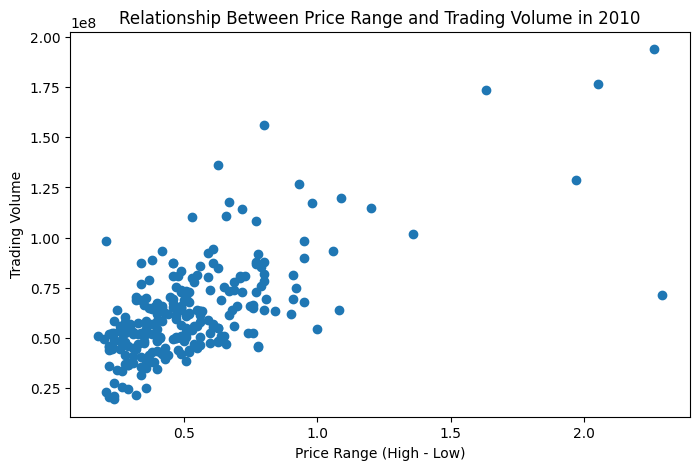

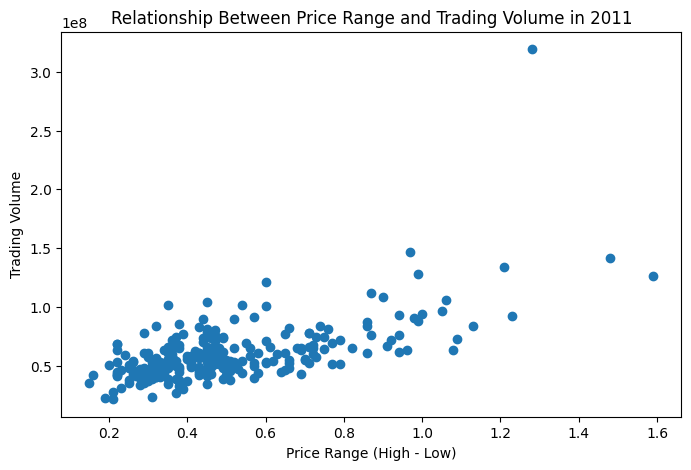

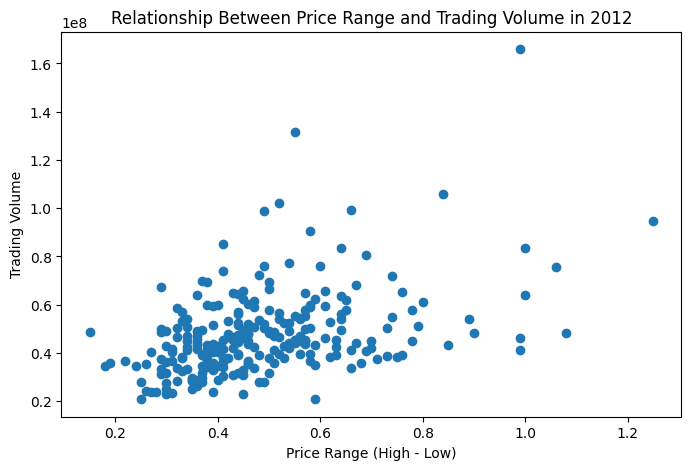

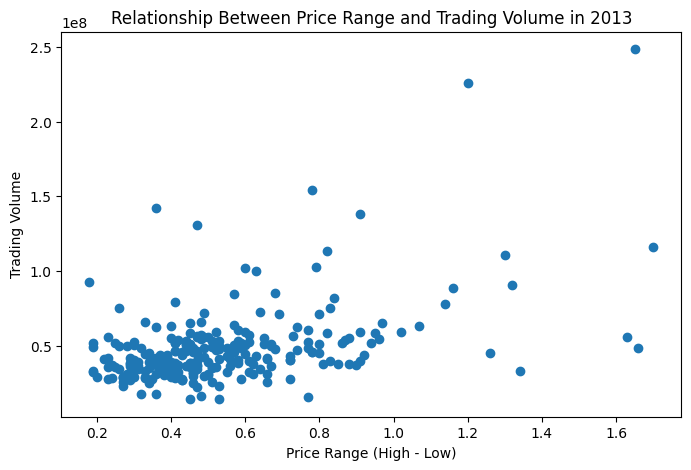

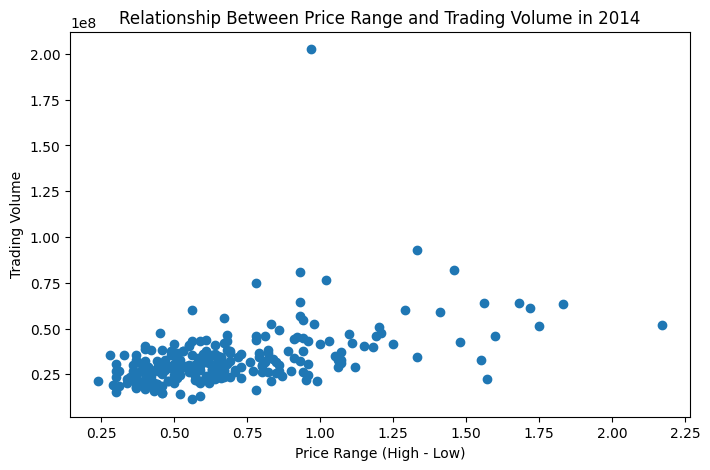

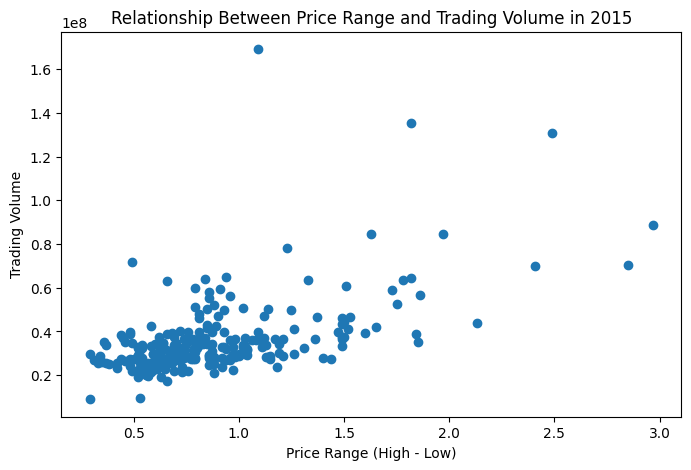

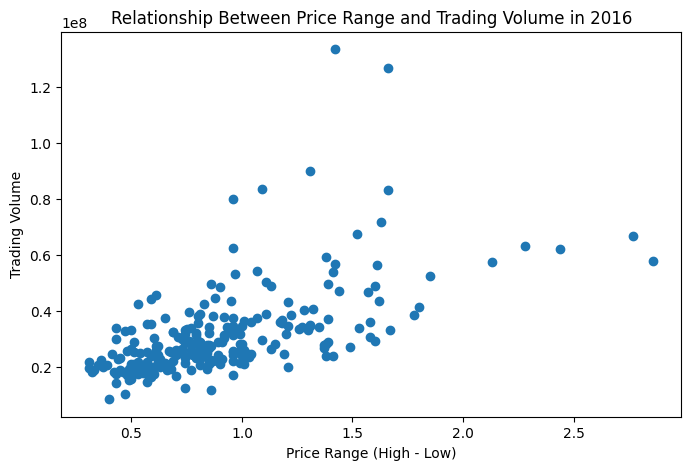

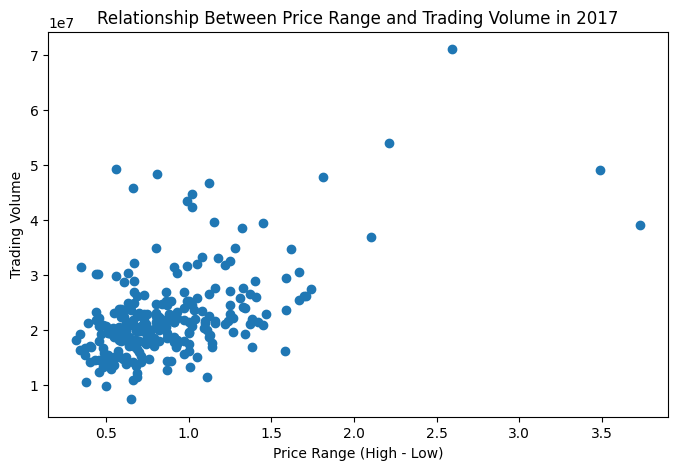

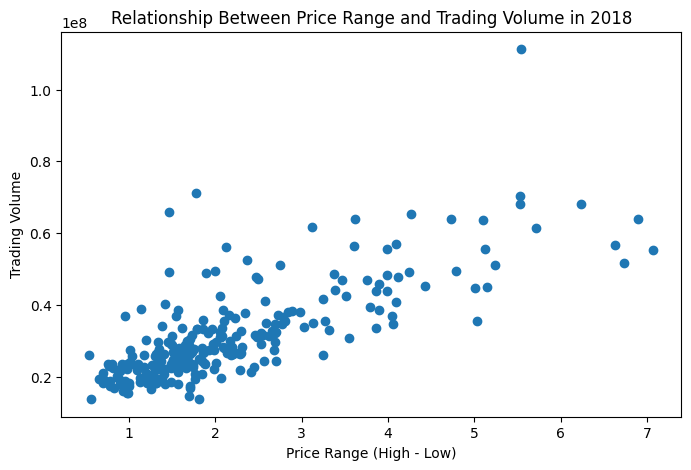

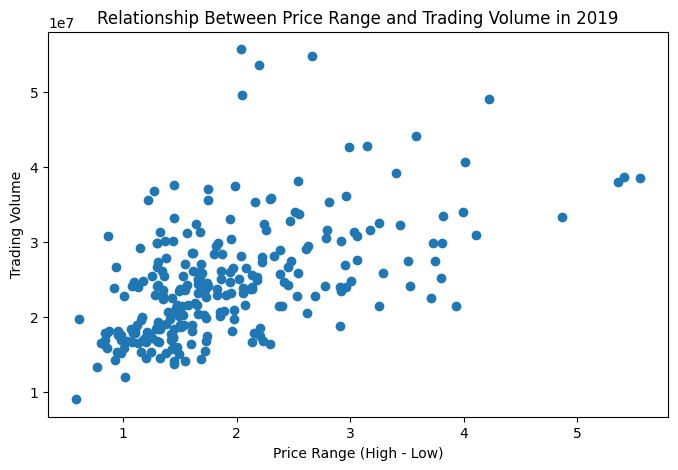

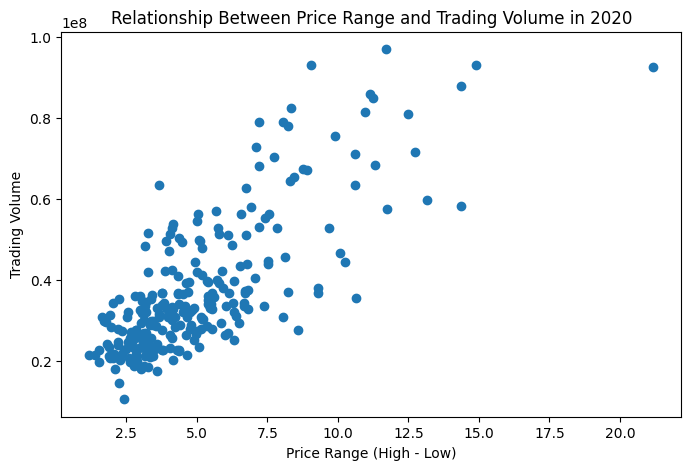

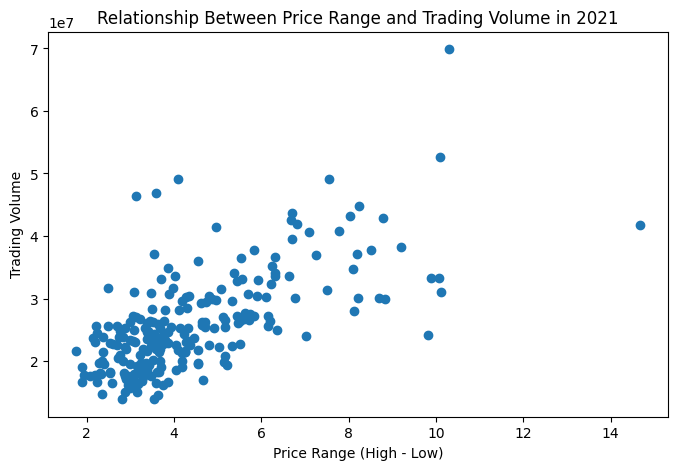

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming your data is stored in a DataFrame named df
# If not, you can load your data using pd.read_csv or another method

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Calculate the difference between daily maximum and minimum prices and trading volume for each year
for year, group in df.groupby(df.index.year):
    group['Price Range'] = group['High'] - group['Low']
    
    # Plot the relationship for each year
    plt.figure(figsize=(8, 5))
    plt.scatter(group['Price Range'], group['Volume'])
    plt.title(f'Relationship Between Price Range and Trading Volume in {year}')
    plt.xlabel('Price Range (High - Low)')
    plt.ylabel('Trading Volume')
    plt.show()


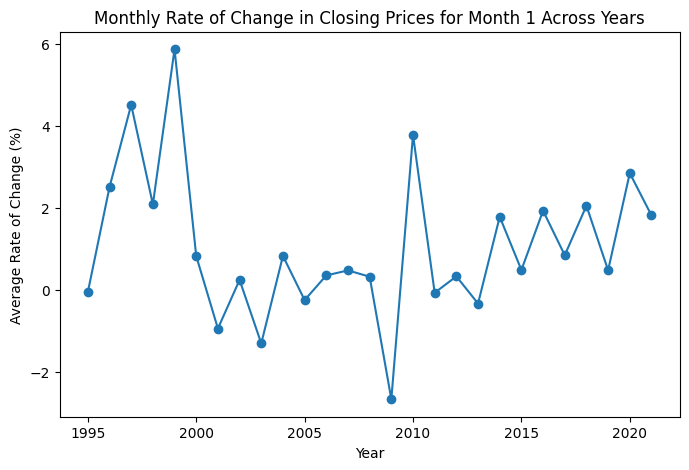

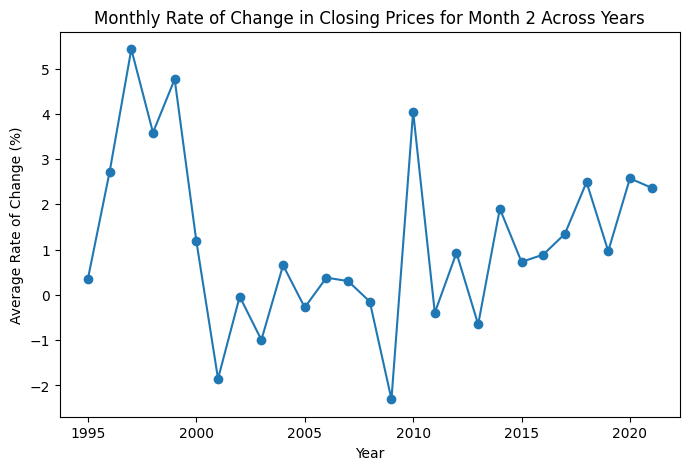

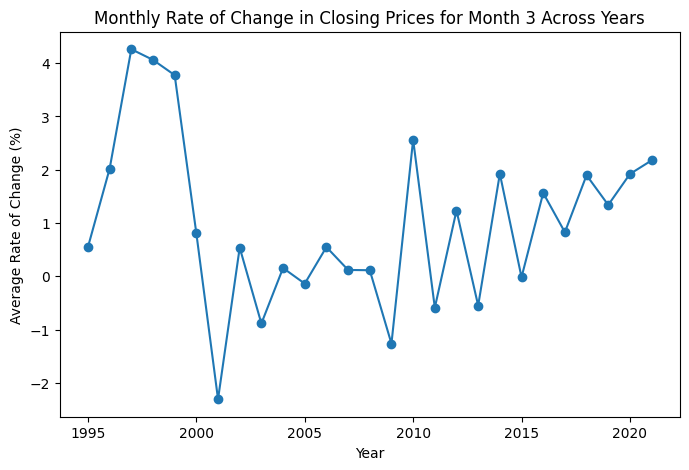

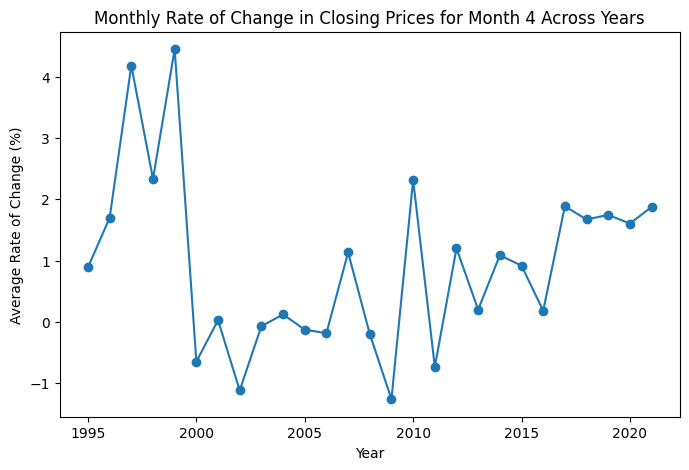

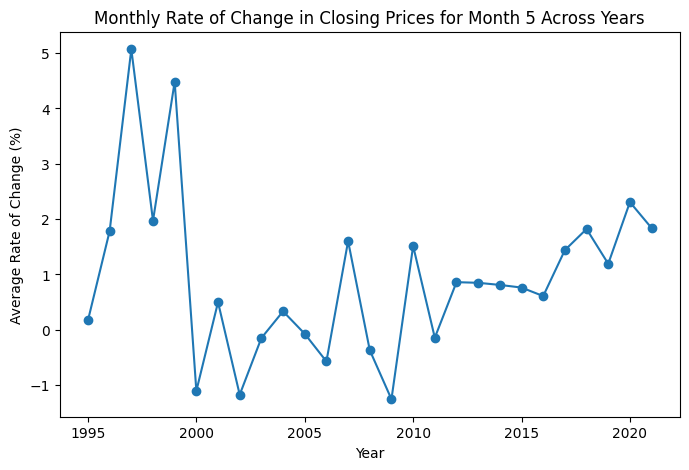

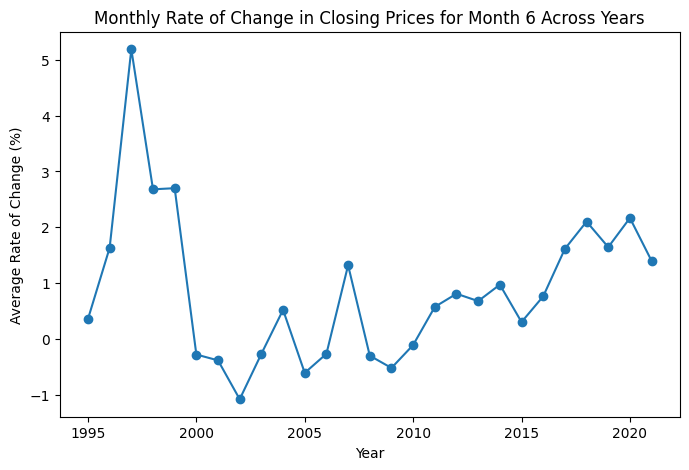

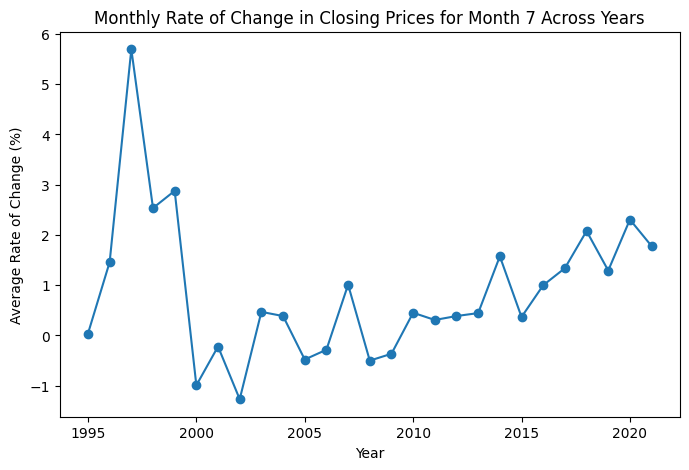

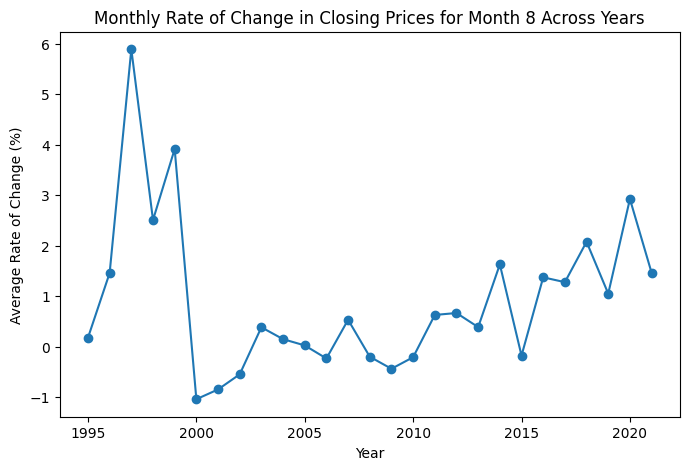

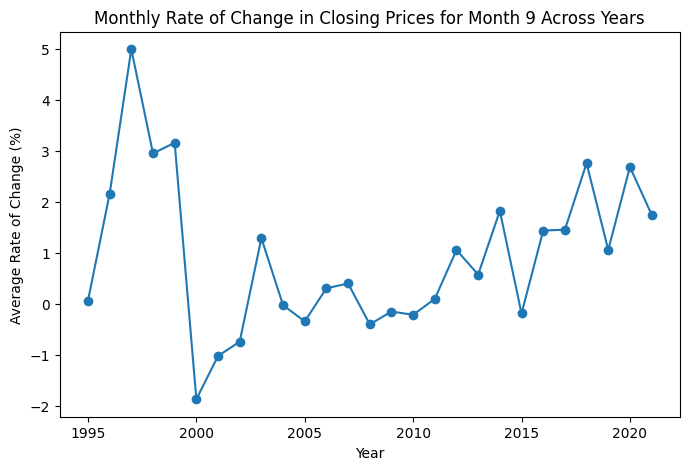

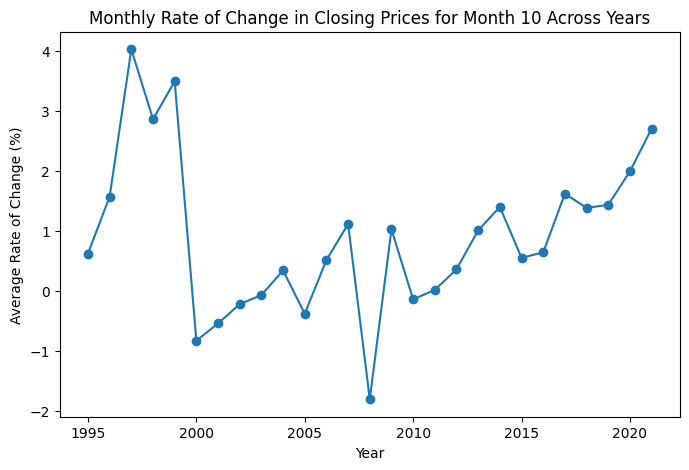

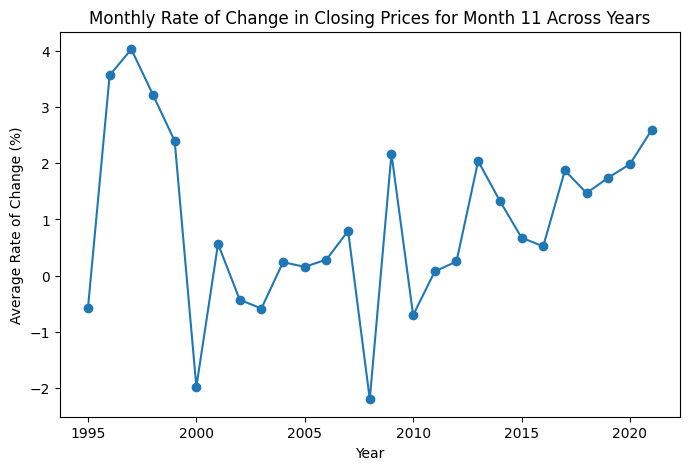

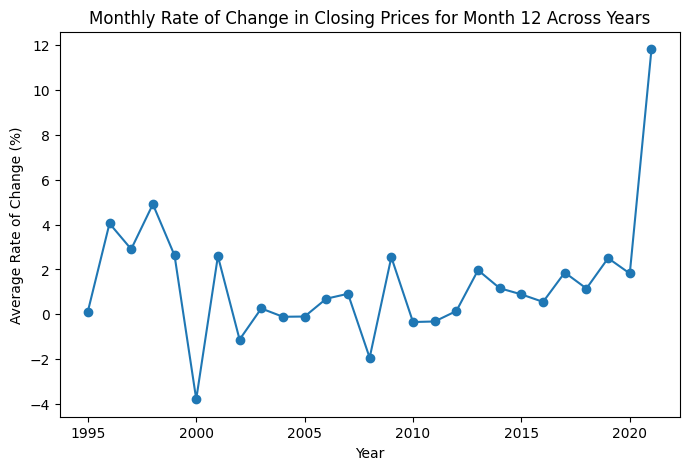

In [5]:
for month in range(1,13):
    target_month = month  # Replace with the desired month (1 for January, 2 for February, and so on)
    # Filter data for the chosen month
    df_target_month = df[df.index.month == target_month]
    # Calculate the rate of change in closing prices for the chosen month across years
    monthly_rate_change = df_target_month.pct_change().groupby(df_target_month.index.year)['Close'].mean() * 100

    # Plot the rate of change for the chosen month across years
    plt.figure(figsize=(8, 5))
    plt.plot(monthly_rate_change, marker='o', linestyle='-')
    plt.title(f'Monthly Rate of Change in Closing Prices for Month {target_month} Across Years')
    plt.xlabel('Year')
    plt.ylabel('Average Rate of Change (%)')
    plt.show()

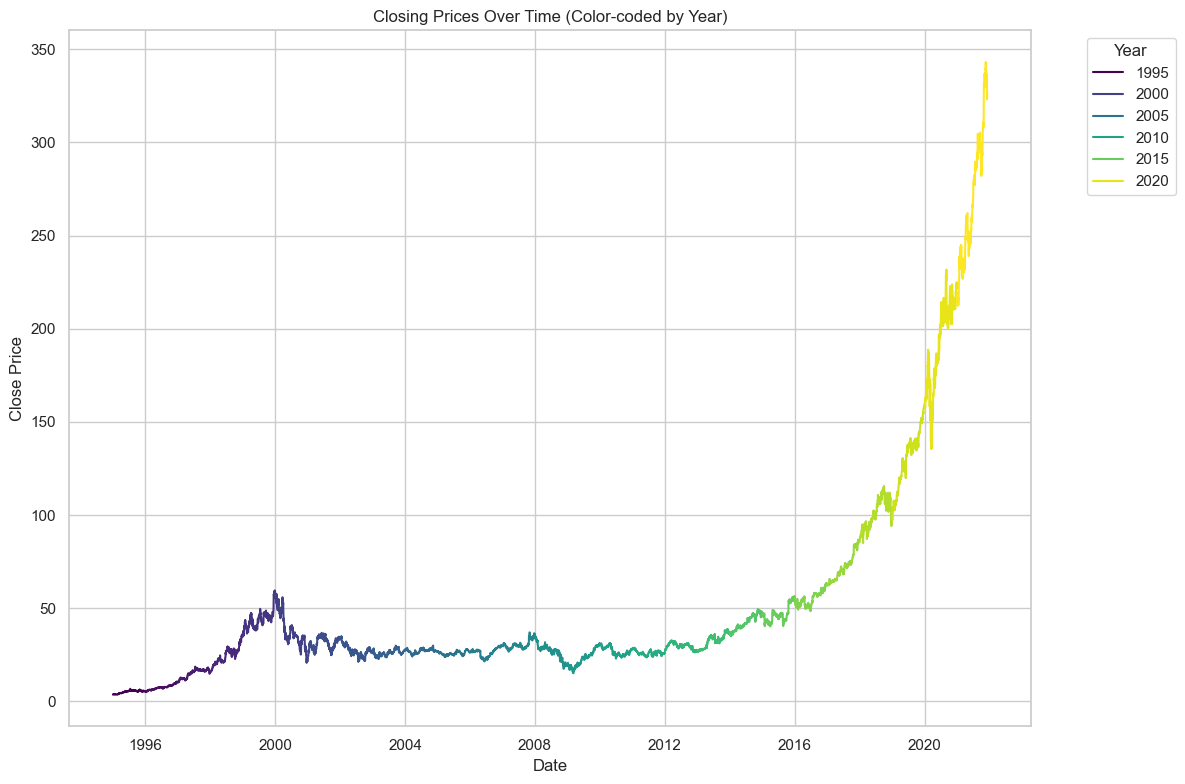

In [6]:

# Create subplots for each year using Seaborn
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Plot the data using Seaborn's lineplot
sns.lineplot(data=df, x=df.index, y='Close', hue=df.index.year, palette='viridis')

plt.title('Closing Prices Over Time (Color-coded by Year)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


In [10]:

# Calculate daily price change
df['Price Change'] = df['Close'].diff()

# Identify whether the stock went up, down, or stayed the same each day
df['Direction'] = np.where(df['Price Change'] > 0, 'Up', np.where(df['Price Change'] < 0, 'Down', 'No Change'))

# Calculate number of continuous up days
def continueUpDays():
    

Number of continuous up days: 1771
Number of continuous down days: 1766
